In [ ]:
!pip install seaborn

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
EPOCH_MAX = 1000
LR = 1e-2


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# create input with no 'salse' column
X_data = df.drop('Sales',axis = 1)
Y_data = df['Sales']
X_data = scaler.fit_transform(X_data)
print(X_data[:5])
print(Y_data.head())

[[ 0.96985227  0.98152247  1.77894547]
 [-1.19737623  1.08280781  0.66957876]
 [-1.51615499  1.52846331  1.78354865]
 [ 0.05204968  1.21785493  1.28640506]
 [ 0.3941822  -0.84161366  1.28180188]]
0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64


In [ ]:
def predict(x,w,b):
    return np.dot(x,w) + b
def gradient(y_hat,y,x):
    # dw = (1/m) *(y_hat-y)*X = loss*X/m
    # db = (1/m) * (y_hat - y) = loss/m
    loss = y_hat-y
    dw = np.dot(x.T,loss)/len(y)
    db = np.sum(loss)/len(y)
    cost = np.sum(loss**2)/(2*len(y))
    return (dw,db,cost)
def update_weight(w,b,lr,dw,db):
    new_w = w - lr*dw
    new_b = b - lr*db
    return (new_w,new_b)

In [11]:
type(X_data)

numpy.ndarray

In [13]:
X_data.shape

(200, 3)

In [14]:
w = np.zeros(X_data.shape[1])
b = 1
costs = []
for epoch in range(EPOCH_MAX):
    y_hat = predict(X_data,w,b)
    (dw,db,cost) = gradient(y_hat,Y_data,X_data)
    costs.append(cost)
    if (epoch % 100 ==0):
        print(f'epcoch: {epoch}: cost = {cost}')
    (w,b) = update_weight(w,b,LR,dw,db)
    

epcoch: 0: cost = 113.725475
epcoch: 100: cost = 16.301089047300188
epcoch: 200: cost = 3.3642986207993797
epcoch: 300: cost = 1.6267885527910022
epcoch: 400: cost = 1.390929873012838
epcoch: 500: cost = 1.3584210332209725
epcoch: 600: cost = 1.3538196481248657
epcoch: 700: cost = 1.3531370424223292
epcoch: 800: cost = 1.3530277067249128
epcoch: 900: cost = 1.3530081975956834


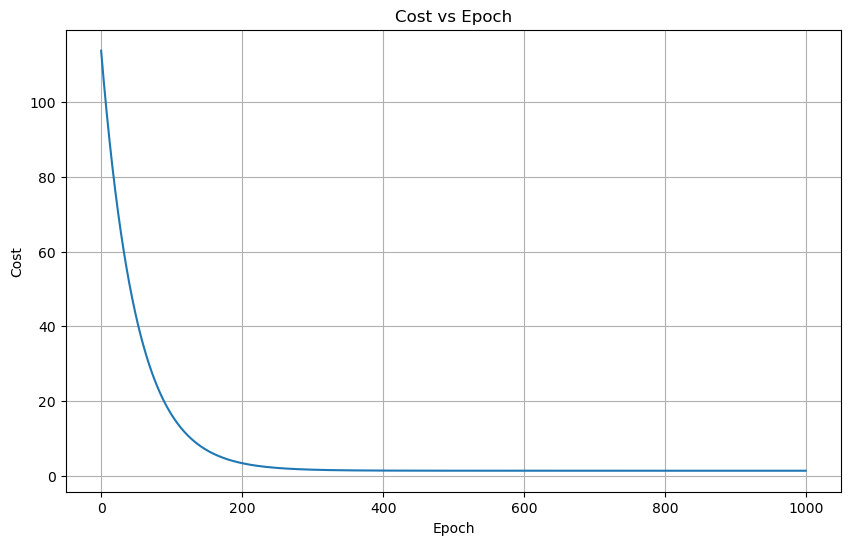

In [15]:
plt.figure(figsize=(10,6))
plt.plot(costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch')
plt.grid(True)
plt.show()